# Parameter identification interface
### User-interface to perform parameter identification of bioscrape/SBML models

* Simple functions to import models/data 
* Use the fast deterministic and stochastic simulators available within bioscrape
* (Optionally) Specify paramter priors, desired likelihood/cost functions 
* Create your own likelihood functions interface

## Loglikelihood Functions
Bioscrape comes with a number of built in log-likelihood functions for deterministic or stochastic parameter inference. These functions are detailed in the following notebook. First, a simple model is made to test the functions:

$\emptyset \xrightarrow[]{k_1} X \; \; \; \; X \xrightarrow[]{d_1} \emptyset$

A set of N trajectories is then generated from this model, from either the same or different initial conditions, across the same or different time-windows. Gaussian noise is then added to all the samples.

In [32]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model

import numpy as np
import pylab as plt

# Import bioscrape XML / bioscrape model object M / SBML file
# M  = bs.types.read_model_from_sbml(filename)
# M = Model('models/pid_model.xml')

# Or...Create a Model using the bioscrape API
species = ['X']
reactions = [(['X'], [], 'massaction', {'k':'d1'}), ([], ['X'], 'massaction', {'k':'k1'})]
k1 = 10.0
d1 = .2
params = [('k1', k1), ('d1', d1)]
initial_condition = {'X':0}
M = Model(species = species, reactions = reactions, parameters = params, 
          initial_condition_dict = initial_condition)

M_original = Model(species = species, reactions = reactions, parameters = params, 
          initial_condition_dict = initial_condition)
# Import data from CSV
# data = import_timeseries('test_data.csv', time_column = 2, value_column = 4, properties = {3 : 51})

M.py_initialize()

N = 10 #Number of trajectories
nT = 50 #number of timepoints
noise_std = 5 #Standar deviation of the guassian noise added onto the measurements

MultipleTimepoints = True #Different timepoints for each trajectory?
timepoint_list = []
timepoints = np.linspace(np.random.randint(0, 10), np.random.randint(10, 100), nT)
#Generate Trajectories
R = [] #Results as Pandas Dataframes
data = [] #Results will become a numpy array
MultipleInitialConditions = True #Different initial conditions for each trajectory?

X0_list = [] #multiple initial conditions will be saved for inference
for n in range(N):
    if MultipleInitialConditions:
        initial_condition = {'X': np.random.randint(0, 100)}
        X0_list.append(initial_condition)
        
    if MultipleTimepoints:
        timepoints = np.linspace(np.random.randint(0, 10, 1), np.random.randint(10, 100, 1), num = 50).flatten()
        timepoint_list.append(timepoints)
    
    M.set_species(initial_condition)
    r = py_simulate_model(timepoints, Model = M, stochastic = True)
    R.append(r)
    noisy_data = r['X'].to_numpy() + np.random.normal(loc = 0, scale = noise_std, size = nT)
    data.append(noisy_data)


In [34]:

M_original.get_parameter_values()

array([ 0.2, 10. ])

### To run the MCMC algorithm to identify parameters from the data, the following code can be used.

Sample log-like: 3751.81829875293
Sample log-like: 3751.654105280847
Sample log-like: 3752.1989684664595
Sample log-like: 3752.349383779626
Sample log-like: 3751.4714794310185
Sample log-like: 3751.8352057209663
Sample log-like: 3751.720409453172
Sample log-like: 3750.403081122635
Sample log-like: 3751.51415733545
Sample log-like: 3751.5865500422947
Sample log-like: 3751.5069283758003
Sample log-like: 3751.7355062989304
Sample log-like: 3751.3442256316603
Sample log-like: 3751.8616075007767
Sample log-like: 3752.256218079821
Sample log-like: 3751.087957459368
Sample log-like: 3750.7008355993735
Sample log-like: 3751.9623900871907
Sample log-like: 3750.086749595974
Sample log-like: 3752.360654333117
Sample log-like: 3751.239397222862
Sample log-like: 3750.9369013367154
Sample log-like: 3751.645753843996
Sample log-like: 3751.946469519527
Sample log-like: 3751.3174718162963
Sample log-like: 3751.246651259132
Sample log-like: 3751.741129938143
Sample log-like: 3751.307057419555
Sample log

c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\emcee\ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\emcee\ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


0.0 percent complete
0.5 percent complete
1.0 percent complete
1.5 percent complete
2.0 percent complete
2.5 percent complete
3.0 percent complete
3.5 percent complete
4.0 percent complete
4.5 percent complete
5.0 percent complete
5.5 percent complete
6.0 percent complete
6.5 percent complete
7.0 percent complete
7.5 percent complete
8.0 percent complete
8.5 percent complete
9.0 percent complete
9.5 percent complete
10.0 percent complete
10.5 percent complete
11.0 percent complete
11.5 percent complete
12.0 percent complete
12.5 percent complete
13.0 percent complete
13.5 percent complete
14.0 percent complete
14.5 percent complete
15.0 percent complete
15.5 percent complete
16.0 percent complete
16.5 percent complete
17.0 percent complete
17.5 percent complete
18.0 percent complete
18.5 percent complete
19.0 percent complete
19.5 percent complete
20.0 percent complete
20.5 percent complete
21.0 percent complete
21.5 percent complete
22.0 percent complete
22.5 percent complete
23.0 per

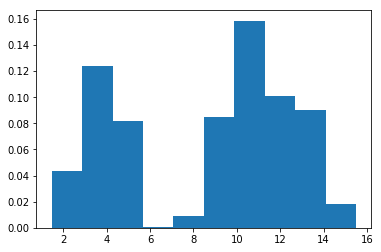

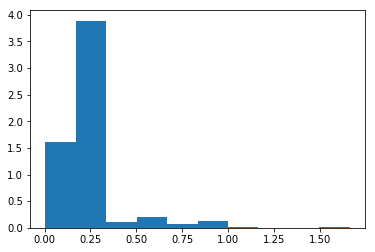

{'k1': array([9.8850057]), 'd1': array([0.17042365])}


c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\bioscrape\emcee_interface.py:202: UserWarning: For stochastic simulation of SBML models using bioscrape, it is highly recommended to NOT use reversible reactions as the SSA algorithm might not work for such cases.
  warnings.warn('For stochastic simulation of SBML models using bioscrape, it is highly recommended to NOT use reversible reactions as the SSA algorithm might not work for such cases.')


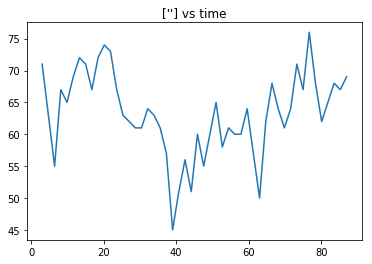

In [35]:
# Run parameter identification procedure using Python emcee -
from bioscrape.pid_interfaces import *
from bioscrape.emcee_interface import *

pid = initialize_mcmc()
pid.exp_data = np.array(data)
pid.M = M
pid.prior = {'k1' : [1e-3, 1e3],'d1' : [1e-2, 1e2]}
pid.params_to_estimate = {'k1':10, 'd1':0.2}
pid.type = 'deterministic'
pid.timepoints = timepoint_list
pid.initial_conditions = X0_list
pid.nsamples = 50
pid.nsteps = 200
pid.nwalkers = 40
fitted_model, params = pid.run_mcmc(plot_show = True)

In [36]:
fitted_model.get_parameter_values()

array([0.17042365, 9.8850057 ])

In [37]:
M_original.get_parameter_values()

array([ 0.2, 10. ])